#**1.IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio 
 
pio.renderers.default = "svg" 

#**2.LOADING THE DATASET**

In [2]:
raw_ds = pd.read_csv('Zomato Chennai Listing 2020.csv') 

In [3]:
raw_ds.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


#**3.GETTING BASIC INFORMATION ABOUT THE DATASET**

In [4]:
raw_ds.shape

(12032, 12)

In [5]:
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
raw_ds.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


#**4. CLEANING THE DATASET**

#**a.Dropping the duplicated rows and useless column**

In [7]:
#1.hecking the duplicate records
raw_ds[raw_ds.duplicated()]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [8]:
#2.dropping column which are not required for further analysis
raw_ds.drop(['Zomato URL','Address','Top Dishes','Features'],axis=1,inplace=True)

In [9]:
raw_ds.head()

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],500.0,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...",1000.0,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...",500.0,4.3,1361,4.4,10500
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",500.0,4.0,1101,4.0,11200
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...",450.0,4.2,617,4.1,22400


#**b. Removing the Null Records**


In [10]:
#Checking for Null records in the dataset
raw_ds.isnull().sum()

Name of Restaurant          0
Location                    0
Cuisine                     0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
dtype: int64

In [11]:
#Replacing the null values with 0
raw_ds["Dining Rating"].fillna(0,inplace=True)
raw_ds.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8400\2390559890.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Name of Restaurant          0
Location                    0
Cuisine                     0
Price for 2                 0
Dining Rating               0
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
dtype: int64

In [12]:
#Replacing the  null values with '0' in Dining Rating column
raw_ds["Dining Rating Count"].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8400\1762316612.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [13]:
#Replace the null values with 0 in Delivery Rating column
raw_ds['Delivery Rating'].fillna(0,inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_8400\2136402698.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [14]:
#Replacing the null values with '0'
raw_ds["Delivery Rating Count"].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8400\1633553088.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





#**c. Converting the DataTypes of numerical columns to numeric dataype**


In [15]:
raw_ds['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: count, Length: 794, dtype: int64

In [16]:
# Replacing the text values with '0' 
raw_ds['Dining Rating Count'].replace(to_replace=['Does not offer Dining','Not enough Dining Reviews'],value='0',inplace=True)


In [17]:
raw_ds['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
0                               220
27                               34
37                               30
                               ... 
3530                              1
7705                              1
6374                              1
1773                              1
1617                              1
Name: count, Length: 2282, dtype: int64

In [18]:
# Replacing the text values with '0' 
raw_ds['Delivery Rating Count'].replace(to_replace=['Not enough Delivery Reviews','Does not offer Delivery'],value='0',inplace=True)

In [19]:
# Changing Data Type of the numerical columns 
raw_ds['Price for 2'] = raw_ds['Price for 2'].astype('int64')
raw_ds['Dining Rating Count'] = raw_ds['Dining Rating Count'].astype('int64')
raw_ds['Delivery Rating Count'] = raw_ds['Delivery Rating Count'].astype('int64')

In [20]:
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Price for 2            12032 non-null  int64  
 4   Dining Rating          12032 non-null  float64
 5   Dining Rating Count    12032 non-null  int64  
 6   Delivery Rating        12032 non-null  float64
 7   Delivery Rating Count  12032 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 752.1+ KB


#**d. Removing the restaurant records whose Rating or Votes is 0**


In [21]:
# Finding those restaurant whose has 0 Rating or Votes 
useless_data=(raw_ds['Dining Rating']==0.0)|(raw_ds['Dining Rating Count']==0)
raw_ds[useless_data]

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
6,Bai Veetu Kalyanam,Navallur,['Biryani'],350,0.0,0,4.3,1061
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],300,0.0,0,3.9,19600
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...",350,0.0,0,4.0,11200
107,The Red Box,Anna Nagar West,['Chinese'],200,0.0,0,4.2,11500
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']",300,0.0,0,3.9,652
...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],350,0.0,0,0.0,0
12028,CK's Sandwiches,Kolathur,['Sandwich'],350,0.0,0,0.0,0
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],350,0.0,0,0.0,0
12030,CK's Sandwiches,Ramapuram,['Sandwich'],350,0.0,0,0.0,0


In [22]:
raw_ds = raw_ds[~useless_data] 

In [23]:
useless_data1=(raw_ds['Delivery Rating']==0.0)|(raw_ds['Delivery Rating Count']==0)
raw_ds[useless_data1]

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
15,Welcome Hotel,Purasavakkam,"['South Indian', ' Desserts', ' Beverages']",300,4.5,1094,0.0,0
18,Wire Room Bar & Kitchen,"Phoenix Market City, Velachery","['Continental', ' Asian']",2000,4.1,354,0.0,0
23,BFF 2.0,RA Puram,"['North Indian', ' Continental', ' Italian']",1500,4.2,464,0.0,0
85,Bazaar - All Day Diner - Grand by GRT Hotels,Grand by GRT Hotels,"['North Indian', ' South Indian', ' Continenta...",2500,4.4,1198,0.0,0
89,Coal Barbecues,Velachery,"['North Indian', ' Chinese']",1400,4.4,9410,0.0,0
...,...,...,...,...,...,...,...,...
11711,London Bakery,Pallavaram,"['Bakery', ' Fast Food', ' Beverages']",400,3.2,9,0.0,0
11714,Kumbakonam Filter Coffee,"OMR Food Street, Navallur",['Beverages'],100,2.0,4,0.0,0
11773,Kekiz The Cake Shop,Purasavakkam,"['Bakery', ' Desserts']",450,2.9,6,0.0,0
11801,Amma Unavagam,K.K. Nagar,['South Indian'],150,3.3,5,0.0,0


In [24]:
raw_ds = raw_ds[~useless_data1] 

#**e.Working on 'Location' Column**


In [25]:
raw_ds['Location'].value_counts()

Location
Porur                                      148
Anna Nagar East                            145
Velachery                                  145
Ambattur                                   123
T. Nagar                                   119
                                          ... 
Fairfield by Marriot, Chengalpattu           1
Hilton Chennai, Guindy                       1
Abhiramapuram                                1
Hotel Marina Inn, Egmore                     1
Spectrum The Grand Venus Mall, Perambur      1
Name: count, Length: 161, dtype: int64

In [26]:
raw_ds['Location']=raw_ds['Location'].str.replace('East|east|West|west','',regex=True)


In [27]:
raw_ds['Location']=raw_ds['Location'].str.replace('Gokulam Park Hotel','Ashok Nagar',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('T.Nagar|T. Nagar','T.Nagar',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('East Coast Road (ECR)','ECR',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('The Savera Hotel,RK Salai (Cathedral Road)','Mylapore',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('Old Mahabalipuram Road (OMR)|Dash@OMR|Days Hotel|IBIS Hote|RMZ Millenia Business Park','OMR',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('Hotel Maris','Gopalapuram',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('V7 Hotel','Porur',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('Potheri','Kanchipuram District',regex=True)

In [28]:
raw_ds

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],500,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...",1000,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...",500,4.3,1361,4.4,10500
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",500,4.0,1101,4.0,11200
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...",450,4.2,617,4.1,22400
...,...,...,...,...,...,...,...,...
11666,Juice World,Alandur,"['Beverages', ' Fast Food']",300,2.0,4,3.9,42
11667,Juice World,Palavakkam,"['Beverages', ' Fast Food']",300,2.0,4,3.9,48
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,"['South Indian', ' Sandwich', ' Chinese', ' St...",200,3.2,6,3.9,48
11785,Engineers Kitchen,Ambattur,"['North Indian', ' Chinese', ' Andhra']",400,2.5,6,3.5,214


#**5. Copying the cleaned data into a new DataFrame**


In [29]:
Chennai_zomato_df = raw_ds.copy() 

In [30]:
Chennai_zomato_df.head()

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],500,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...",1000,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...",500,4.3,1361,4.4,10500
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",500,4.0,1101,4.0,11200
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...",450,4.2,617,4.1,22400


#**5. Performing Exploratory Data Analysis**

#**Q1) How many restaurants are in Chennai for each type of cuisine?**



In [31]:
!pip install -U kaleido

In [32]:
cuisine_type_df= Chennai_zomato_df.assign(Cuisine=Chennai_zomato_df['Cuisine'].str.split(', ')).explode('Cuisine')


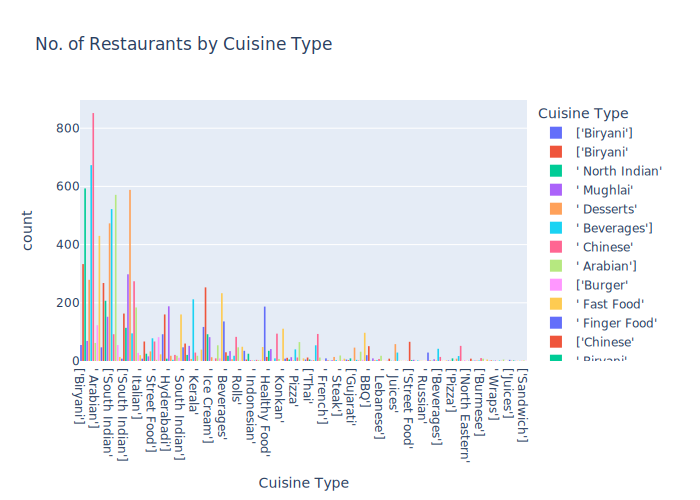

In [33]:
fig = px.histogram(cuisine_type_df, x='Cuisine', color='Cuisine',
                   title= 'No. of Restaurants by Cuisine Type',
                   labels={'Cuisine':'Cuisine Type'}) 
fig.show() 


#**Q2) a. What are the percentage of restaurants by Dining Rating Type in Chennai?**

In [34]:
rating_type_df = Chennai_zomato_df['Dining Rating'].value_counts().reset_index()
rating_type_df.rename(columns={'Dining Rating':'Rating Type','count':'COUNT OF RESTAURANTS'},inplace=True)
rating_type_df 

,Rating Type,COUNT OF RESTAURANTS
0,3.7,387
1,3.6,377
2,3.5,359
3,3.8,334
4,3.4,320
5,3.9,301
6,3.3,293
7,3.2,260
8,3.1,236
9,4.0,222


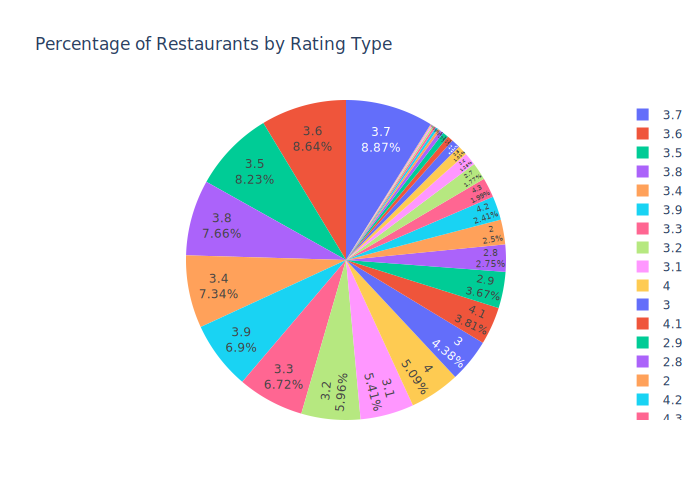

In [35]:
fig = px.pie(rating_type_df, names='Rating Type', values='COUNT OF RESTAURANTS', color='Rating Type',
             title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show() 
    

#**Q2) b. What are the percentage of restaurants by Delivery Rating Type in Chennai?**

In [36]:
rating_type_df = Chennai_zomato_df['Delivery Rating'].value_counts().reset_index()
rating_type_df.rename(columns={'Delivery Rating':'Rating Type','count':'COUNT OF RESTAURANTS'},inplace=True)
rating_type_df 

,Rating Type,COUNT OF RESTAURANTS
0,3.9,939
1,3.8,530
2,4.0,437
3,3.7,411
4,4.1,356
5,3.6,329
6,4.2,302
7,3.5,220
8,4.3,219
9,3.4,169


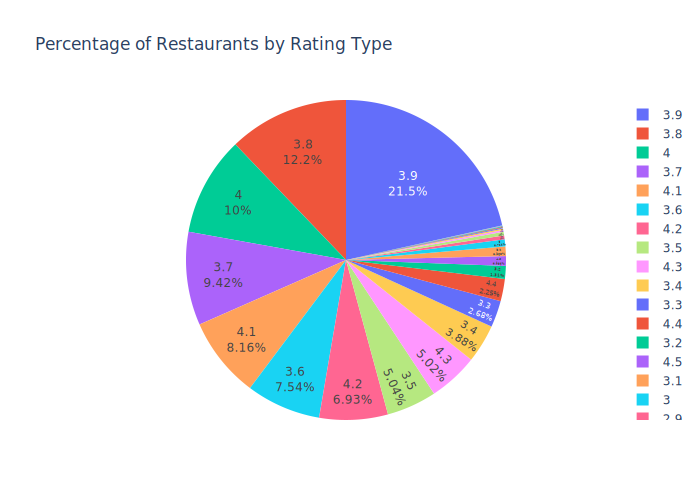

In [37]:
fig = px.pie(rating_type_df, names='Rating Type', values='COUNT OF RESTAURANTS', color='Rating Type',
             title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#**Q3) Which are the Top 10 highest rated Seafood Restaurant in chennai?**

In [38]:
seafood_df = Chennai_zomato_df[Chennai_zomato_df['Cuisine'].str.contains('Seafood')]
seafood_df.sort_values(by='Dining Rating',ascending=False).head(10) 

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
195,The Marina,Nungambakkam,"['Seafood', ' North Indian', ' Chinese']",1600,4.8,1082,4.3,373
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,"['Finger Food', ' Seafood', ' Italian', ' Cont...",1600,4.5,964,3.4,50
315,Layalee,Ekkaduthangal,"['Arabian', ' BBQ', ' Seafood', ' Chinese', ' ...",700,4.4,586,4.1,143
96,Urban Spatula,Anna Nagar,"['Continental', ' Seafood', ' Biryani', ' Ital...",800,4.4,794,4.3,911
14,Hotel Paramount,Kilpauk,"['North Indian', ' Chinese', ' Seafood', ' Sou...",500,4.3,1266,4.2,17700
133,Azzuri Bay,Adyar,"['Italian', ' Mediterranean', ' Thai', ' Seafo...",1000,4.3,2430,4.0,369
9027,Copper Kitchen,Kotturpuram,"['North Indian', ' Chinese', ' Chettinad', ' S...",1000,4.3,1739,3.7,8659
9026,Copper Kitchen,Porur,"['North Indian', ' Chinese', ' Chettinad', ' S...",1000,4.3,5073,3.9,26800
237,The Cascade,Nungambakkam,"['Seafood', ' Chinese', ' Asian', ' Thai', ' M...",1000,4.3,613,4.1,1886
153,The Bayleaf,Gopalapuram,"['Mughlai', ' North Indian', ' Seafood', ' Bir...",800,4.3,542,4.0,224


#**Q4)a. Which restaurant provides the best Continental food(Dining)in Chennai?**

In [39]:
continental_df = Chennai_zomato_df[Chennai_zomato_df['Cuisine'].str.contains('Continental')]
continental_df.sort_values(by='Dining Rating',ascending=False,inplace=True) 
continental_df


C:\Users\Admin\AppData\Local\Temp\ipykernel_8400\210188581.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
184,Gossip Fusion Bistro,Kanathur,"['Italian', ' Continental', ' Burger', ' Sandw...",1500,4.9,996,4.3,500
67,Pumpkin Tales,Alwarpet,"['Singaporean', ' American', ' European', ' Co...",1800,4.5,768,4.0,245
68,Sandy's Chocolate Laboratory,Nungambakkam,"['Cafe', ' Continental', ' Italian', ' Desserts']",1400,4.5,2252,4.3,1973
9228,Blind Ch3mistry,Besant Nagar,"['Cafe', ' Continental', ' Italian', ' Dessert...",700,4.5,1893,4.0,275
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,"['Finger Food', ' Seafood', ' Italian', ' Cont...",1600,4.5,964,3.4,50
...,...,...,...,...,...,...,...,...
9532,Cheesy Juicy Burgers,Kodambakkam,"['Burger', ' Fast Food', ' Continental', ' Bev...",500,3.3,80,3.9,353
9333,La Chocolate,Nungambakkam,"['Bakery', ' Desserts', ' Italian', ' Continen...",800,3.2,91,4.2,622
1567,24x7 Bytes,"Gokulam Park Sabari - OMR, Old Mahabalipuram R...","['North Indian', ' Continental', ' South Indian']",1100,3.1,83,3.7,147
1533,The Balcony Cafe,Nungambakkam,"['Cafe', ' Italian', ' Continental']",600,2.9,51,4.1,121


#**Q4) Which restaurant provides the best Continental food (Delivery) in Chennai?**

In [40]:
continental_df = Chennai_zomato_df[Chennai_zomato_df['Cuisine'].str.contains('Continental')]
continental_df.sort_values(by='Delivery Rating',ascending=False,inplace=True) 
continental_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_8400\108311134.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
164,La Chocolate,Egmore,"['Bakery', ' Desserts', ' Italian', ' Continen...",800,4.0,256,4.5,1574
350,Santé Spa Cuisine,Nungambakkam,"['Italian', ' Continental', ' Healthy Food', '...",1300,4.4,378,4.4,257
150,Rain Forest,Adyar,"['North Indian', ' Asian', ' Continental', ' M...",800,4.2,1534,4.4,726
9332,La Chocolate,Thiruvanmiyur,"['Bakery', ' Desserts', ' Italian', ' Continen...",800,3.9,83,4.3,1735
68,Sandy's Chocolate Laboratory,Nungambakkam,"['Cafe', ' Continental', ' Italian', ' Desserts']",1400,4.5,2252,4.3,1973
...,...,...,...,...,...,...,...,...
152,Pause Bar & Kitchen,"OMR Food Street, Kandanchavadi","['Italian', ' Continental', ' Chinese', ' Nort...",1200,4.3,607,3.3,107
299,Convo@C20,Adyar,"['Cafe', ' American', ' Continental', ' Italia...",1000,4.1,417,3.2,712
656,Avatar,Porur,"['North Indian', ' Continental']",800,3.8,209,3.2,97
3864,Pizzeria,GST Road,"['Continental', ' Pizza', ' Fast Food']",300,3.7,15,3.1,190


#**Q5) Which places have the highest rated restaurant for delivery in Chennai?**

In [41]:
highest_rated_df = Chennai_zomato_df[Chennai_zomato_df['Delivery Rating'] >= 4.5]
highest_rated_df.sort_values(by='Delivery Rating',ascending=False,inplace=True) 


C:\Users\Admin\AppData\Local\Temp\ipykernel_8400\1249634968.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
highest_rated_df.head(5)

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
1985,Arabian Plate,Adambakkam,"['Arabian', ' Biryani']",300,3.7,58,4.7,491
9977,ibaco,Mylapore,['Ice Cream'],200,3.6,55,4.7,230
4371,Mumbai Kulfi,Pallavaram,['Desserts'],150,3.7,11,4.7,141
9160,Fruit Shop On Greams Road,Besant Nagar,"['Beverages', ' Fast Food', ' Healthy Food', '...",350,4.4,394,4.6,1559
9544,Bombay Kulfi,Kilpauk,['Ice Cream'],150,3.1,16,4.6,391


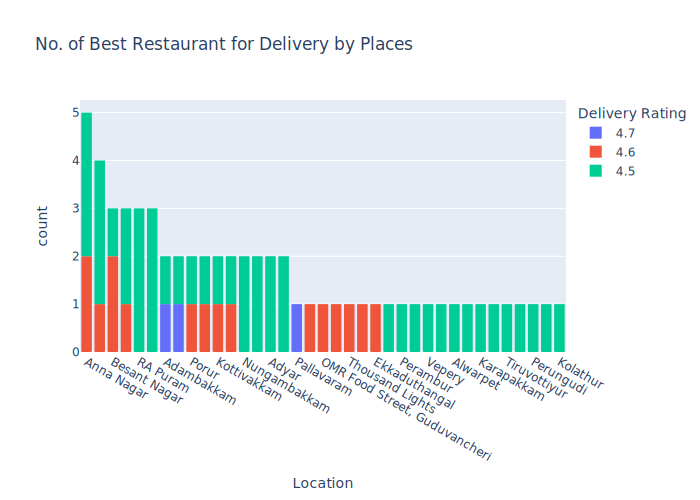

In [43]:
fig = px.histogram(highest_rated_df, x='Location', color='Delivery Rating',
                   title= 'No. of Best Restaurant for Delivery by Places').update_xaxes(categoryorder="total descending")
                                                                                                
fig.show() 

#**Q6) What is the Avg Price Distibution of highest rated restaurant for Delivery Rating in Chennai?**


In [44]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Delivery Rating'])['Price for 2'].mean().reset_index()
highest_rated_price_df.head() 

,Location,Delivery Rating,Price for 2
0,Adambakkam,4.5,200.000000
1,Adambakkam,4.7,300.000000
2,Adyar,4.5,325.000000
3,Alwarpet,4.5,500.000000
4,Anna Nagar,4.5,366.666667


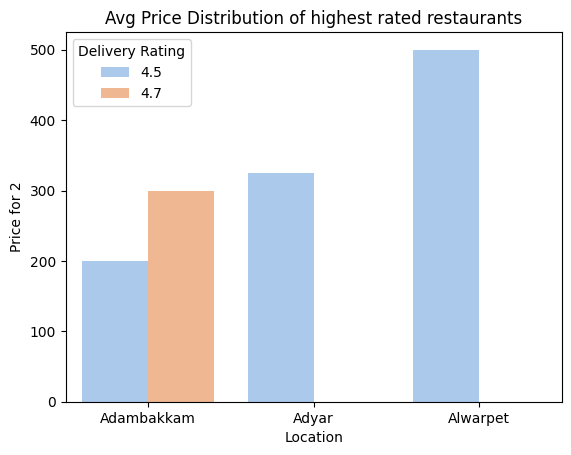

In [45]:
sns.barplot(x = "Location", y = "Price for 2", data = highest_rated_price_df.head(4),hue="Delivery Rating",palette="pastel").set_title("Avg Price Distribution of highest rated restaurants")
plt.show()


#**Q7) Which areas have a large number of Chinese Restaurant Market?**


In [46]:
chinese_df =Chennai_zomato_df[Chennai_zomato_df['Cuisine'].str.contains('Chinese')]
chinese_df 

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...",500,4.3,1361,4.4,10500
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...",450,4.2,617,4.1,22400
5,Dine N Fun,Medavakkam,"['South Indian', ' North Indian', ' Chinese']",450,4.1,567,3.8,24700
8,Savoury Sea Shell,Anna Nagar,"['Arabian', ' Chinese', ' North Indian', ' Leb...",1400,4.2,2564,4.1,21700
9,Sangeetha Veg Restaurant,T.Nagar,"['South Indian', ' North Indian', ' Chinese', ...",800,4.4,1578,4.2,39600
...,...,...,...,...,...,...,...,...
11382,Texas Treat,Selaiyur,"['Bakery', ' North Indian', ' Chinese', ' Ital...",850,3.8,9,3.8,43
11544,Anandhi Idly Kadai,Medavakkam,"['South Indian', ' Chinese']",200,3.4,24,4.1,778
11545,Anandhi Idly Kadai,Selaiyur,"['South Indian', ' Chinese']",200,3.1,17,4.1,367
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,"['South Indian', ' Sandwich', ' Chinese', ' St...",200,3.2,6,3.9,48


In [47]:
chinese_rest_df = chinese_df.groupby(by='Location').agg({'Name of Restaurant' : 'count', 'Price for 2' : 'mean'}).rename(columns= {'Name of Restaurant' :'COUNT OF RESTAURANTS','Price for 2':'Price'}).reset_index()
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(10)
chinese_rest_df.head(25)

,Location,COUNT OF RESTAURANTS,Price
11,Anna Nagar,95,585.789474
87,Porur,58,490.517241
6,Ambattur,52,415.384615
106,T.Nagar,47,501.063830
122,Velachery,46,576.086957
83,Perambur,45,476.666667
50,Kolathur,45,448.888889
90,Ramapuram,43,445.348837
60,Medavakkam,42,530.952381
116,Thuraipakkam,41,578.048780


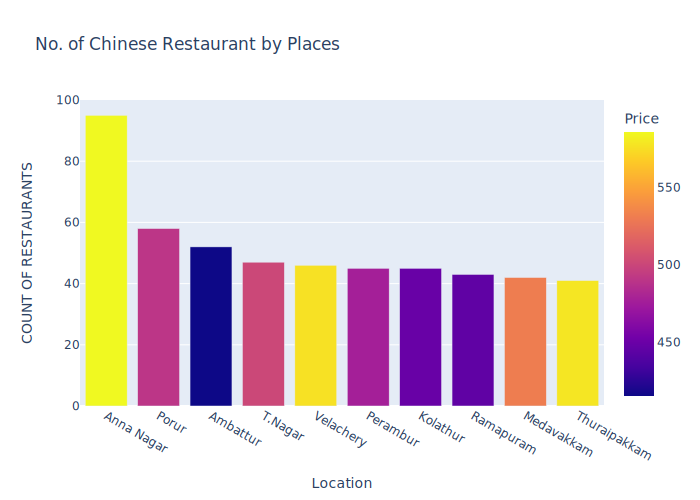

In [48]:
fig = px.bar(chinese_rest_df, x='Location', y='COUNT OF RESTAURANTS', color='Price', title= 'No. of Chinese Restaurant by Places')
fig.show() 


#**Q8) Is there a relation between Price and Dining Rating by each Cuisine Type?**


In [49]:
price_rating_df = cuisine_type_df.groupby(['Cuisine', 'Dining Rating'])['Price for 2'].mean().reset_index()
price_rating_df 

,Cuisine,Dining Rating,Price for 2
0,' American',3.2,400.0
1,' American',3.8,1000.0
2,' American',3.9,600.0
3,' American',4.1,1000.0
4,' American',4.3,1050.0
...,...,...,...
2091,['Tibetan',3.6,400.0
2092,['Tibetan',3.8,450.0
2093,['Tibetan',4.1,250.0
2094,['Tibetan',4.2,350.0


In [50]:
fig = px.line(price_rating_df, y="Price for 2", x="Dining Rating",color='Cuisine',title='Relation between Dining Rating and Price') 

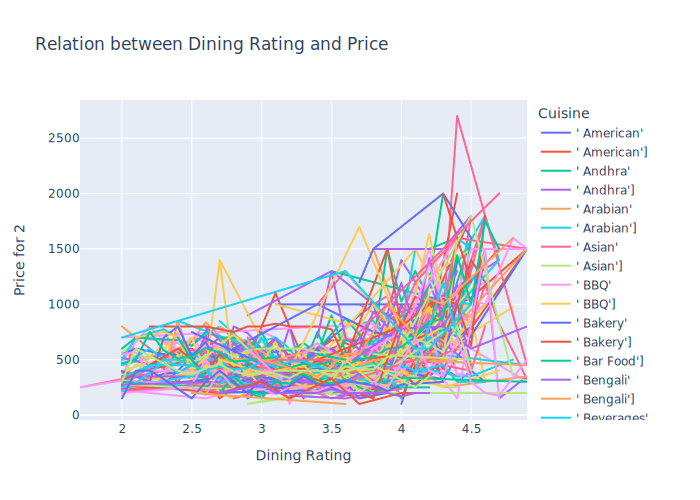

In [51]:
fig.show()

#**Q9) Is there a relation between Region and Price?**

In [52]:
region_price_df =Chennai_zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
region_price_df

,Location,Price for 2
0,Coast Road (ECR),887.500000
1,Mambalam,294.230769
2,Abhiramapuram,200.000000
3,Adambakkam,327.631579
4,Adyar,528.865979
...,...,...
154,Velachery,428.965517
155,Vepery,350.000000
156,Vettuvankeni,475.000000
157,Virugambakkam,425.000000


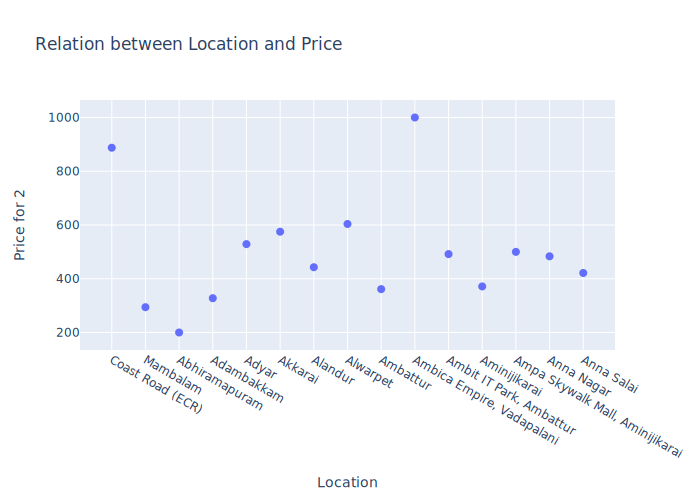

In [53]:
fig = px.scatter(region_price_df.head(15), x="Location", y="Price for 2",title="Relation between Location and Price").update_traces(marker_size=8) 
fig.show()

#**Q10) Find the list of Affordable Restaurants?**

The criteria for Affordable Restaurants would be:
1
Low Price 2) High Reda
d First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our datafre0.

In [54]:
max_price = Chennai_zomato_df['Price for 2'].max()
one_fourth_price = max_price/4
one_fourth_price 

750.0

In [55]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
aff_rest_df =Chennai_zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location']] 
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 750] 
aff_rest_df.sort_values(by='Price for 2', inplace=True) 
aff_rest_df 

,Name of Restaurant,Price for 2,Cuisine,Location
108,Rayar's Mess,100,['South Indian'],Mylapore
1518,Lassi Junction,100,"['Beverages', ' Ice Cream']",Anna Nagar
4564,Iniyavai Delicious Veg Restaurant,100,['South Indian'],Ambattur
5862,A.P.S Chat,100,['Street Food'],Vadapalani
2151,Cane 4 U,100,['Beverages'],Besant Nagar
...,...,...,...,...
8817,Savoury Sea Shell,750,"['Chinese', ' BBQ', ' South Indian']",Thousand Lights
10074,Long Live Pizza,750,"['Pizza', ' Fast Food']",Injambakkam
2296,Ponnis Grand Inn,750,['Thai'],"Ponnis Grand Inn Hotel, Thiruvallur"
2102,Al Arz Restaurant,750,"['Arabian', ' BBQ', ' Chinese', ' North Indian']",George Town


In [56]:
# Finding the highest rated list of restaurants 
highrate_rest_df =Chennai_zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location','Dining Rating']]
highrate_rest_df = highrate_rest_df[highrate_rest_df['Dining Rating'] >= 4.5]
highrate_rest_df.sort_values(by='Price for 2', inplace=True) 
highrate_rest_df.head(10)

,Name of Restaurant,Price for 2,Cuisine,Location,Dining Rating
108,Rayar's Mess,100,['South Indian'],Mylapore,4.7
178,Royal Sandwich Shop,150,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,4.7
9541,Bombay Kulfi,200,['Ice Cream'],Anna Nagar,4.6
320,Bombay Kulfi,200,['Ice Cream'],Adyar,4.9
50,Andhikkadai,200,['South Indian'],Velachery,4.6
24,Eating Circles,250,['South Indian'],Alwarpet,4.7
37,Shree Mithai,300,"['Mithai', ' Street Food', ' Fast Food']",Chetpet,4.6
270,ID,300,['South Indian'],"Sathyam Cinemas Complex, Royapettah",4.5
155,The Sandwich Shop,300,"['Sandwich', ' Fast Food', ' Beverages']",Mambalam,4.9
209,Cream Stone,350,"['Desserts', ' Ice Cream']",Alwarpet,4.5


In [57]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant','Price for 2','Location'])
highrate_aff_df = highrate_aff_df[['Name of Restaurant', 'Price for 2', 'Cuisine_x', 'Location','Dining Rating']]
highrate_aff_df.rename(columns={'Name of REstaurant':'Name of Restaurant','Price for 2':'Price for 2','Cuisine_x':'CUSINE_CATEGORY',
                                'Location':'Location'},inplace=True) 
highrate_aff_df


,Name of Restaurant,Price for 2,CUSINE_CATEGORY,Location,Dining Rating
0,Rayar's Mess,100,['South Indian'],Mylapore,4.7
1,Royal Sandwich Shop,150,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,4.7
2,Royal Sandwich Shop,150,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,4.7
3,Royal Sandwich Shop,150,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,4.7
4,Bombay Kulfi,200,['Ice Cream'],Anna Nagar,4.6
5,Bombay Kulfi,200,['Ice Cream'],Adyar,4.9
6,Andhikkadai,200,['South Indian'],Velachery,4.6
7,Eating Circles,250,['South Indian'],Alwarpet,4.7
8,Shree Mithai,300,"['Mithai', ' Street Food', ' Fast Food']",Chetpet,4.6
9,The Sandwich Shop,300,"['Sandwich', ' Fast Food', ' Beverages']",Mambalam,4.9


#**Q10) Find the list of most Reliable Restaurants?**

The criteria for most Reliable Restaurants would be:
1)
Low Price 2) High Rated 3) Large No. of Vot
es
First step will be to find the restaurants with Votes greater than Mean of Votes

In [58]:
mean_votes =Chennai_zomato_df['Dining Rating Count'].mean() 
mean_votes 

169.73469387755102

In [59]:
# Finding list of restaurants that have Votes greater than and equal to  Mean of Vote 
mean_rest_df=Chennai_zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location','Dining Rating Count']]
mean_rest_df = mean_rest_df[mean_rest_df['Dining Rating Count'] > 170]
mean_rest_df.sort_values(by='Dining Rating Count', inplace=True)
mean_rest_df 

,Name of Restaurant,Price for 2,Cuisine,Location,Dining Rating Count
9521,Wangs Kitchen,800,"['Asian', ' Chinese', ' Momos']",Mogappair,171
9185,Subway,500,"['Healthy Food', ' Fast Food']",Madipakkam,171
1124,Food Fieszta,500,"['North Indian', ' Chinese']",Velachery,171
1115,Harithakom,700,"['Chettinad', ' Kerala', ' Chinese']",Tambaram,172
9137,Hotel Saravana Bhavan,550,"['North Indian', ' South Indian', ' Desserts',...",Ashok Nagar,172
...,...,...,...,...,...
9040,Palmshore,1000,"['North Indian', ' Chinese', ' Arabian', ' BBQ...",Ashok Nagar,4478
9038,Palmshore,1000,"['North Indian', ' Chinese', ' Arabian', ' BBQ...",Ramapuram,4805
9026,Copper Kitchen,1000,"['North Indian', ' Chinese', ' Chettinad', ' S...",Porur,5073
9030,Paradise Biryani,800,"['Biryani', ' North Indian', ' Chinese']",Perungudi,5317


In [60]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['Name of Restaurant','Price for 2', 'Location'])
reliable_rest_df = reliable_rest_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location',]]
reliable_rest_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2':'Price for 2', 'Cuisine':'CUSINE_CATEGORY',   
                                 'Location':'Location'},inplace=True) 
reliable_rest_df 

,Name of Restaurant,Price for 2,CUSINE_CATEGORY,Location
0,Shmoozie's Hand-Crafted Ice Creams,400,"['Ice Cream', ' Desserts']",Egmore
1,Bombay Kulfi,200,['Ice Cream'],Anna Nagar
2,Blind Ch3mistry,700,"['Cafe', ' Continental', ' Italian', ' Dessert...",Teynampet
3,Writer's Cafe,600,"['Cafe', ' American']",Taramani
4,Bombay Kulfi,200,['Ice Cream'],Adyar
5,The Sandwich Shop,300,"['Sandwich', ' Fast Food', ' Beverages']",Mambalam
6,Fruit Shop On Greams Road,350,"['Beverages', ' Fast Food', ' Healthy Food', '...",Thousand Lights
7,Cream Stone,350,"['Desserts', ' Ice Cream']",Thuraipakkam
8,North East Kitchen,450,"['Chinese', ' Konkan', ' Momos']",Egmore
9,Krispy Kreme,400,"['Desserts', ' Beverages']","Express Avenue Mall,Royapettah"
